# EDA for Restaurant rating prediction 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [31]:
df=pd.read_csv('zomato.csv')
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [32]:
df.shape

(51717, 17)

In [33]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [34]:
df=df.drop(['url','address','phone','menu_item','reviews_list','dish_liked'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [36]:
#dropping duplicate
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [37]:
#cleaning 'rate' column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [38]:
def rate_col(val):
    if(val=='NEW' or val=='-'):
        return np.nan
    else:
        val=str(val).split('/')
        val=val[0]
        return float(val)
    
df['rate']=df['rate'].apply(rate_col)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [39]:
# Null values in 'rate' column
df['rate'].isnull().sum()

10019

In [40]:
df['rate'].fillna(df['rate'].median(),inplace=True)
df['rate'].isnull().sum()

0

In [41]:
# Null values in another columns
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [42]:
# Remaining columns contains less number of null values, so we can drop them.
df.dropna(inplace=True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [44]:
# Renaming columns
df.rename(columns={'approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City'},inplace=True)
df.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [46]:
# both 'location' and 'City' columns are same.They shows same type of data so we can drop any one of them. 
df=df.drop(['City'],axis=1)

In [48]:
# cleaning 'cost' column
df['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [50]:
def handleComma(val):
    val=str(val)
    if ',' in val:
        val=val.replace(',','')
        return float(val)
    else:
        return float(val)
    
df['Cost']=df['Cost'].apply(handleComma)
df.Cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [58]:
# cleaning 'rest_type' columns
rest_type=df['rest_type'].value_counts()
rest_type

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Kiosk             2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [59]:
rest_type_lessthan1000=rest_type[rest_type<1000]
rest_type_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Kiosk           2
Cafe, Food Court                2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [60]:
def handle_rest_type(val):
    if val in rest_type_lessthan1000:
        return 'others'
    else:
        return val

df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [62]:
# cleaning 'location column'
location=df['location'].value_counts()
location_lessthan300=location[location<300]

def handle_location(val):
    if val in location_lessthan300:
        return 'others'
    else:
        return val
    
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [71]:
# cleaning 'cuisines' column
cuisines=df['cuisines'].value_counts()
cuisines_lessthan100=cuisines[cuisines<100]

def handle_cuisines(val):
    if val in cuisines_lessthan100:
        return 'others'
    else:
        return val
    
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Italian, Pizza                           102
Name: cuisines, Length: 70, dtype: int64

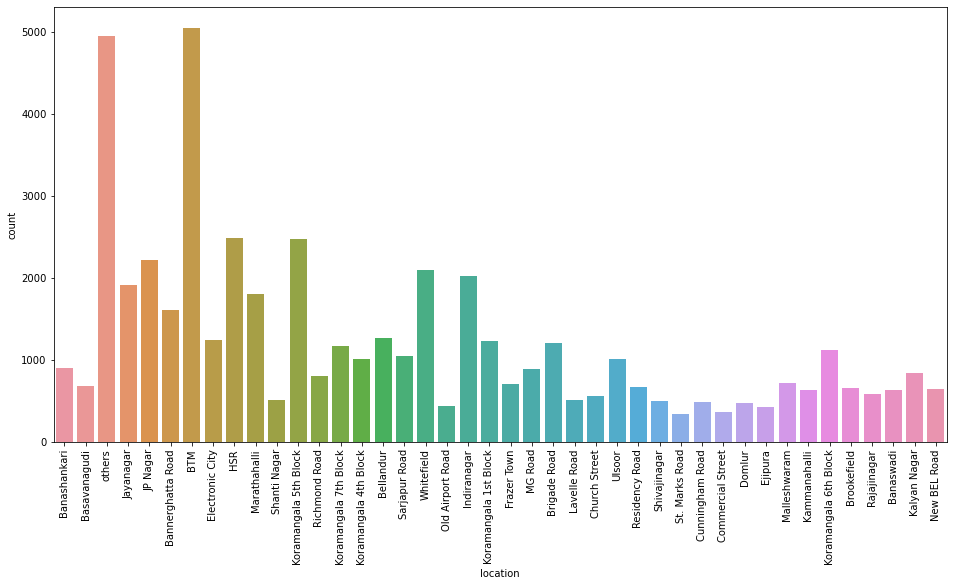

In [92]:
# visualizing 'location' column
plt.figure(figsize=(16,8))
sns.countplot(df['location'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='online_order', ylabel='count'>

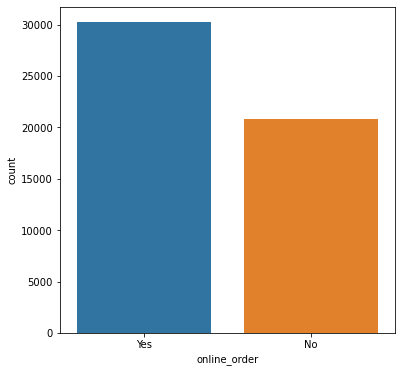

In [90]:
# visualizing 'online_order' column
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'])

<AxesSubplot:xlabel='book_table', ylabel='count'>

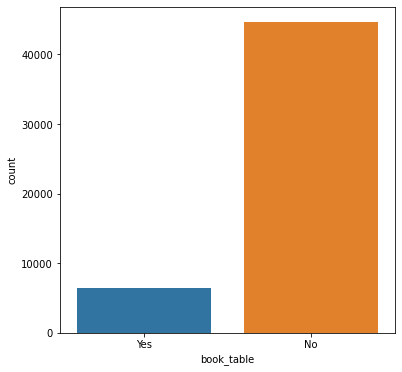

In [89]:
# visualizing 'book_table' column
plt.figure(figsize=(6,6))
sns.countplot(df['book_table'])

<AxesSubplot:>

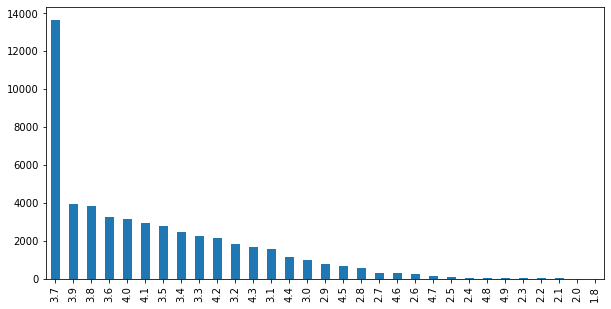

In [154]:
# Ratings
plt.figure(figsize=(10,5))
df['rate'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='online_order', ylabel='rate'>

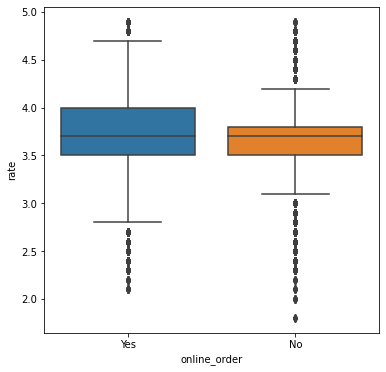

In [91]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

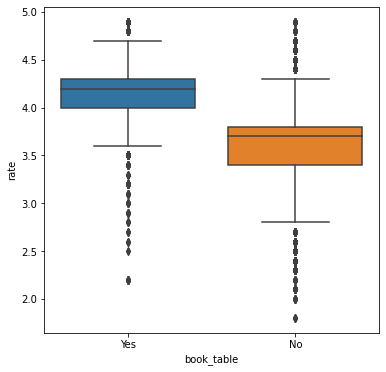

In [95]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

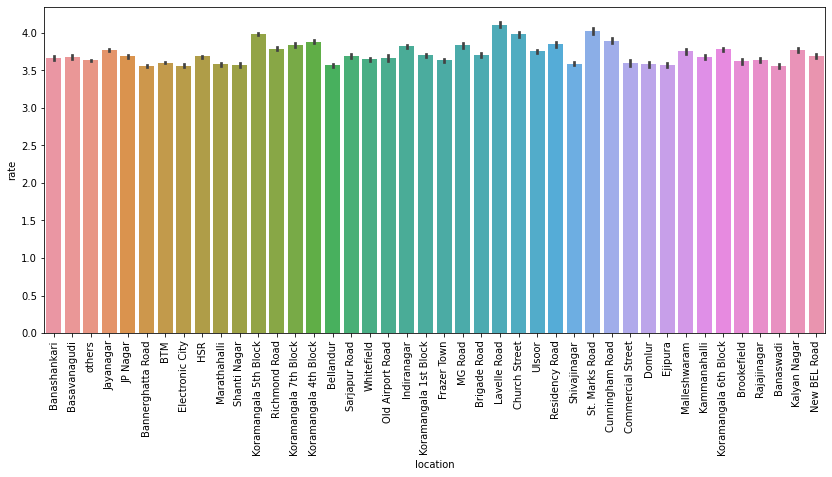

In [104]:
# ratings based on locations
plt.figure(figsize=(14,6))
sns.barplot(x='location',y='rate',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='location'>

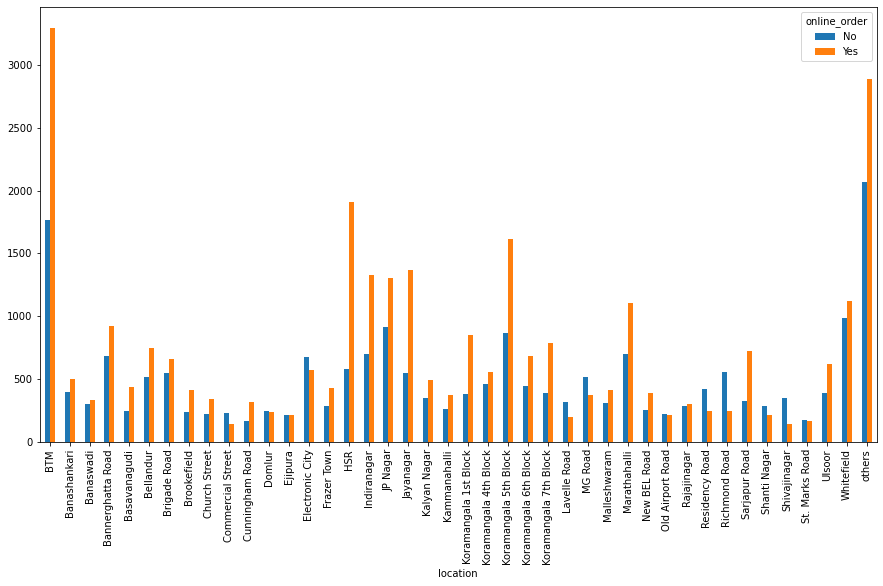

In [98]:
# online order facility based on location
pd.crosstab(df['location'],df['online_order']).plot(kind='bar',figsize=(15,8))

<AxesSubplot:xlabel='location'>

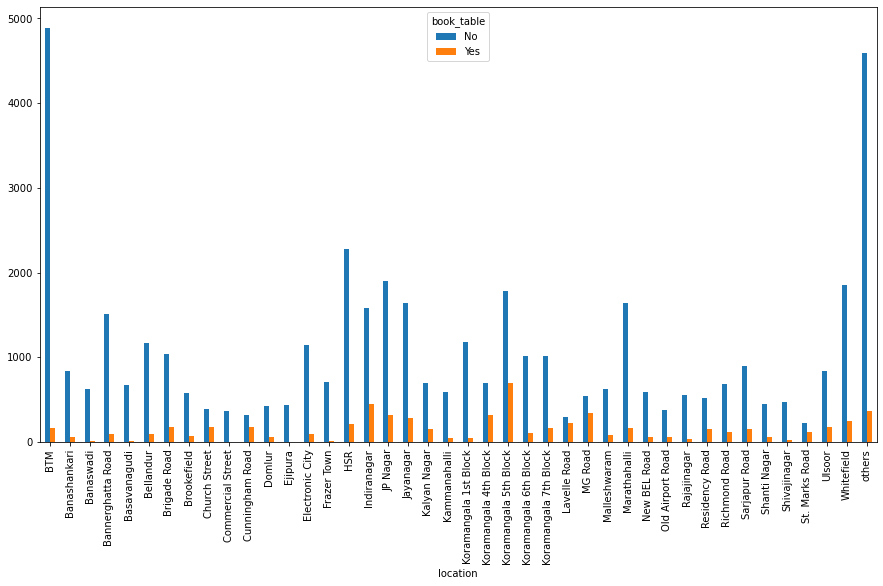

In [105]:
# Table booking facility based on location
pd.crosstab(df['location'],df['book_table']).plot(kind='bar',figsize=(15,8))

From above graphs we can find that,
- The restaurants which are placed in 'Lavelle Road' location have very less number of 'Table booking' and 'Online order' options. But their rating is higher than other restaurants. 
- Eventhough the restaurants which were placed in 'BTM' location have more 'Online order' options, their rating is less.
------------------------------------------------

In [107]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost', 'Type'],
      dtype='object')

<AxesSubplot:xlabel='Type', ylabel='rate'>

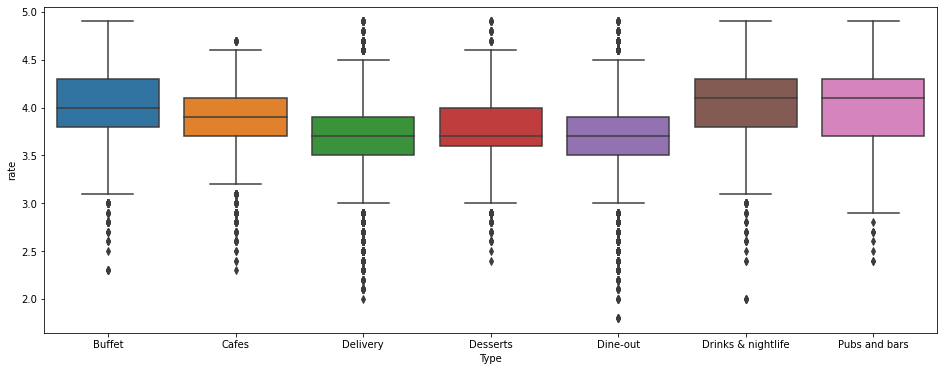

In [110]:
# Ratings based on restaurant type 
plt.figure(figsize=(16,6))
sns.boxplot(x='Type',y='rate',data=df)

In [118]:
# Type of a restaurant based on location
pd.crosstab(df['location'],df['Type'])#.plot(kind='bar',figsize=(15,10))

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,21,83,3053,198,1660,22,19
Banashankari,7,36,418,71,356,14,0
Banaswadi,0,24,310,37,262,6,1
Bannerghatta Road,9,46,828,137,578,9,2
Basavanagudi,7,11,344,66,251,5,0
Bellandur,28,36,617,75,479,17,16
Brigade Road,25,46,497,108,455,57,22
Brookefield,6,17,339,45,245,4,0
Church Street,19,51,193,29,215,36,23


From Above graph and table we can find that,
- In all location the number of 'Pubs & bars' and 'Drinks & nightlife' were very less. But the average rating for both is very high while comparing with other reataurant types.
-----------------------------------------------

<AxesSubplot:>

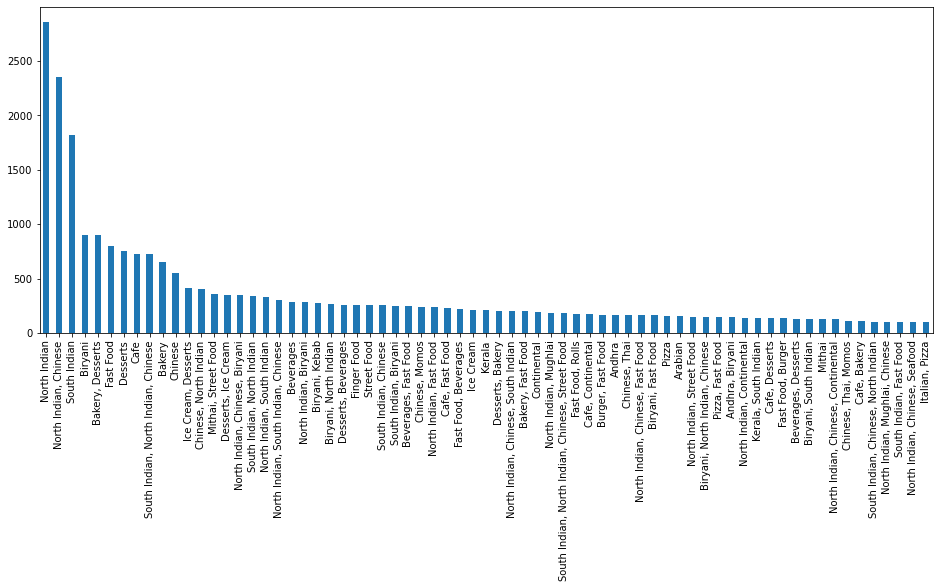

In [138]:
# Top cuisines
df['cuisines'].value_counts()[1:].plot(kind='bar',figsize=(16,6))

<Figure size 720x360 with 0 Axes>

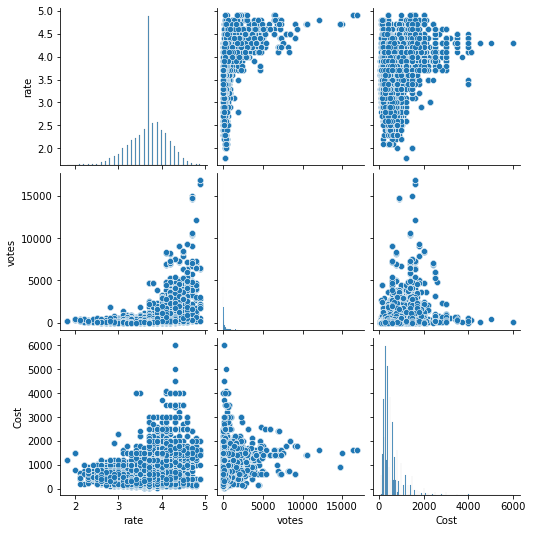

In [155]:
plt.figure(figsize=(10,5))
sns.pairplot(df)

In [147]:
# correlation
df.corr()

,rate,votes,Cost
rate,1.000000,0.428408,0.365708
votes,0.428408,1.000000,0.380882
Cost,0.365708,0.380882,1.000000


<AxesSubplot:title={'center':'Restaurant rating based on cost'}, xlabel='Cost', ylabel='rate'>

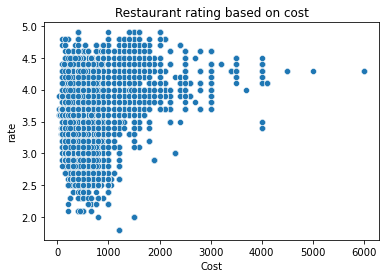

In [145]:
plt.title('Restaurant rating based on cost')
sns.scatterplot(x=df['Cost'],y=df['rate'])

<AxesSubplot:title={'center':'Restaurant rating based on votes'}, xlabel='votes', ylabel='rate'>

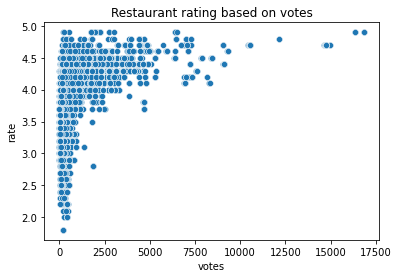

In [144]:
plt.title('Restaurant rating based on votes')
sns.scatterplot(x=df['votes'],y=df['rate'])

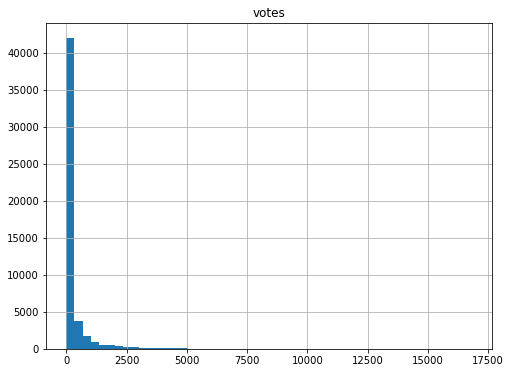

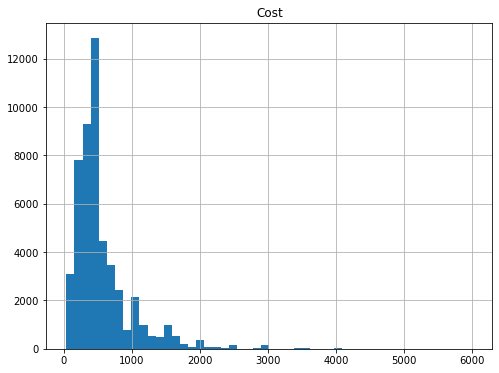

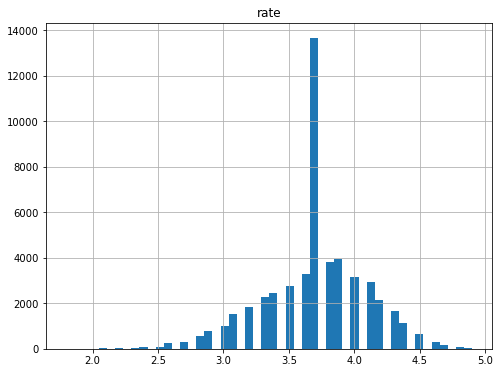

In [149]:
# histogram analysis
cols=['votes','Cost','rate']
for i in cols:
    plt.figure(figsize=(8,6))
    df[i].hist(bins=50)
    plt.title(i)